# **Support Vector Machine (SVM)** (Titanic Dataset )

Accuracy: 0.8252

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        80
           1       0.87      0.71      0.78        63

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143


Confusion Matrix:
[[73  7]
 [18 45]]


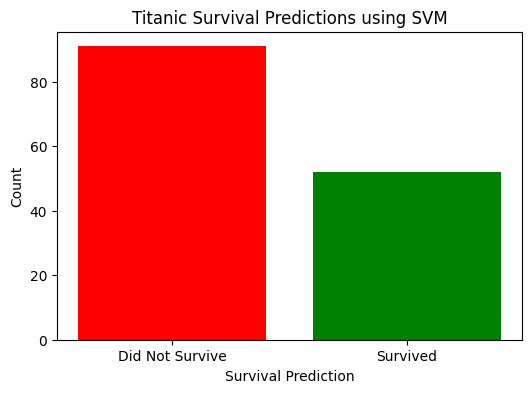

In [15]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv("/content/Titanic_Data.csv")

# Step 2: Preprocess Data
# Select relevant features and drop missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # Encode C, Q, S as numbers

# Separate features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Radial Basis Function (RBF) kernel
svm_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 6: Visualization of Predictions (Optional)
plt.figure(figsize=(6, 4))
plt.bar(['Did Not Survive', 'Survived'], [sum(y_pred == 0), sum(y_pred == 1)], color=['red', 'green'])
plt.xlabel("Survival Prediction")
plt.ylabel("Count")
plt.title("Titanic Survival Predictions using SVM")
plt.show()

